<a href="https://colab.research.google.com/github/pkhurt/computer-vision-course/blob/main/section_4_28_image_processing_morphological_operators.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Morphological Operators
## Definition
Morphological Operators are sets of Kernels that can achieve a variety of effects such as reducing noise.

### Example operators
* Certain Operators are very good at reducing black points on a white background (and vice versa)
* Certain operators can also achieve an erosiion and dilation effect that can add or erode from an existing image.

These effects are most easily seen on text data, so this will be practiced within this notebook

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [36]:
def load_img():
    blank_img = np.zeros((600,600))
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(blank_img, text="ABCDE", org=(50,300), fontFace=font, fontScale=5, color=(255,255,255), thickness=20)

    return blank_img

In [37]:
def display_img(img):
  fig = plt.figure(figsize=(12,10))
  ax = fig.add_subplot(111)
  ax.imshow(img, cmap="gray")

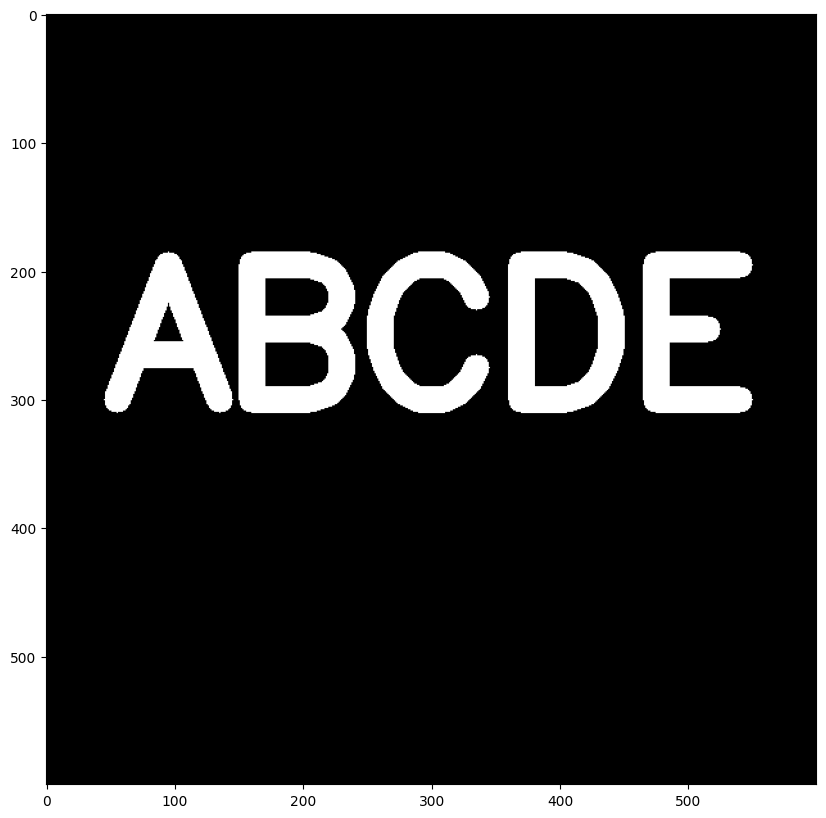

In [38]:
img = load_img()
display_img(img)

## Erosion
Morphological Operators are just specialized kernels to receive a specific effect.

Erosion is an operator that erodes away boundaries of foreground objects.

In [45]:
kernel = np.ones((5,5), dtype=np.uint8)

In [46]:
result = cv2.erode(img, kernel, iterations=4)

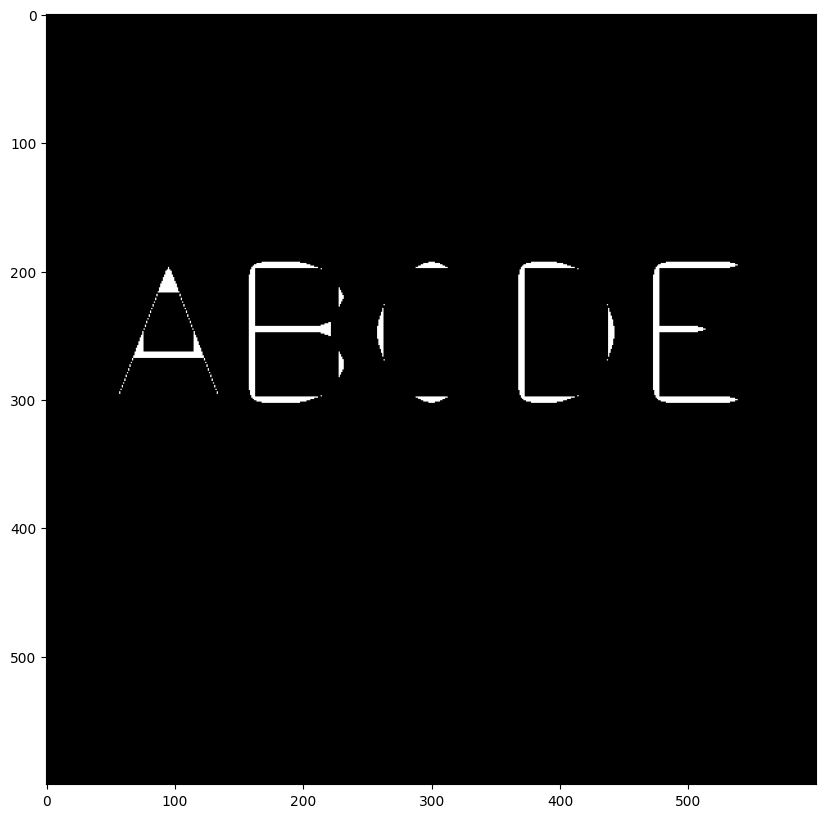

In [47]:
display_img(result)

## Opening & Closing
### Opening
Erosion followed by dilation.

Opening is useful for removing background noise.

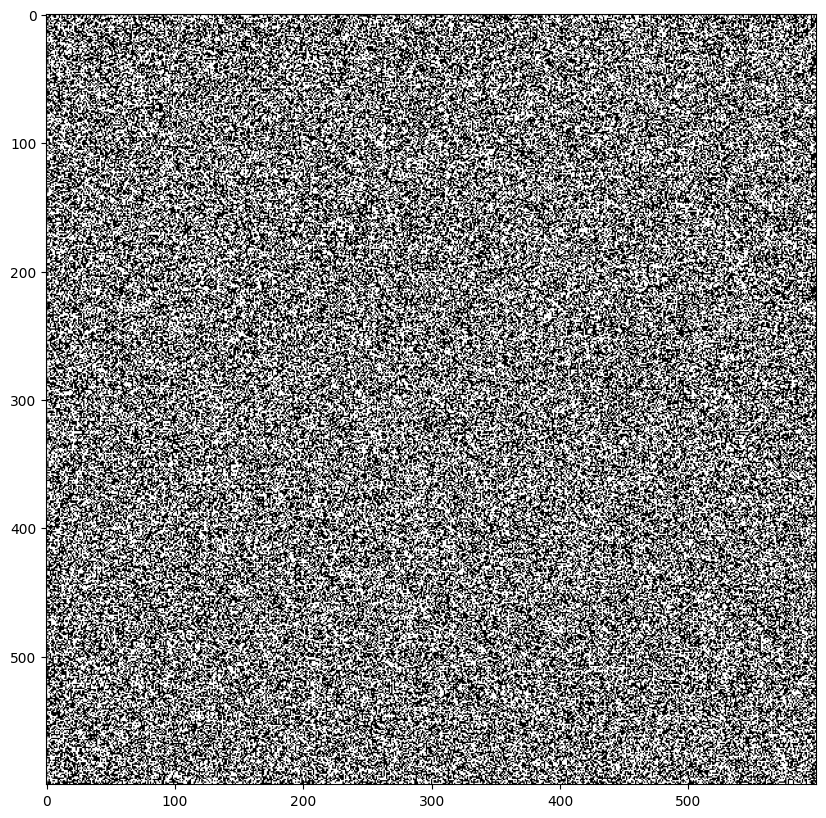

In [48]:
# Now we create a new image with only noise and overlay it with the original image
img2 = load_img()
white_noise = np.random.randint(low=0, high=2, size=(600,600))
display_img(white_noise)

In [49]:
img.max()

255.0

In [50]:
# Since our white noise is currently either 1 or 0 we need to bring it to the values of 255
# because the original image is scaled like that
white_noise = white_noise * 255

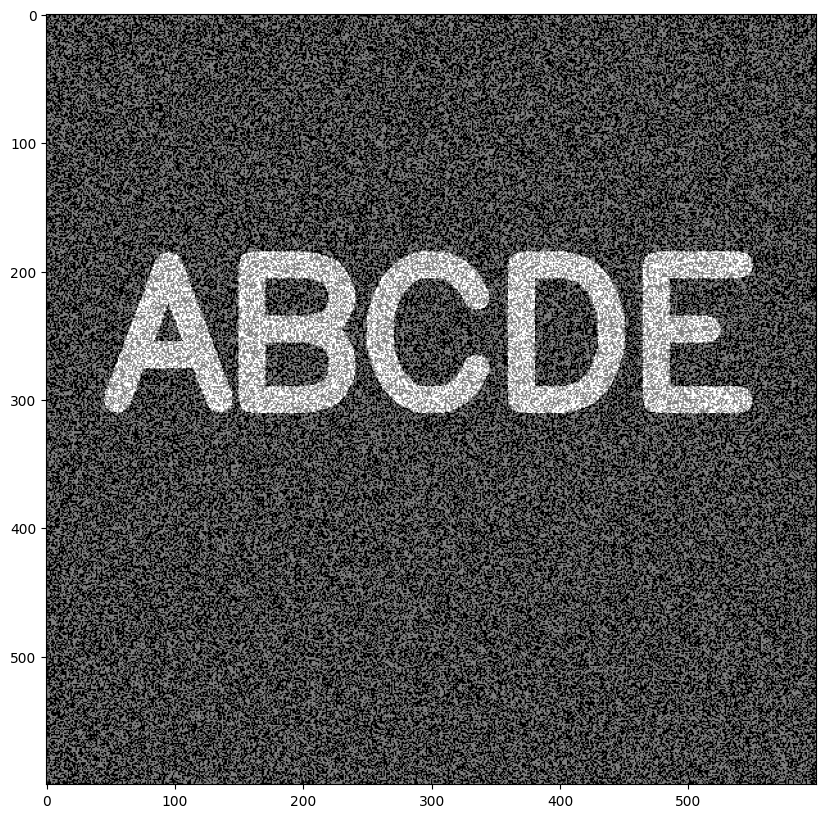

In [51]:
noise_img = white_noise + img
display_img(noise_img)

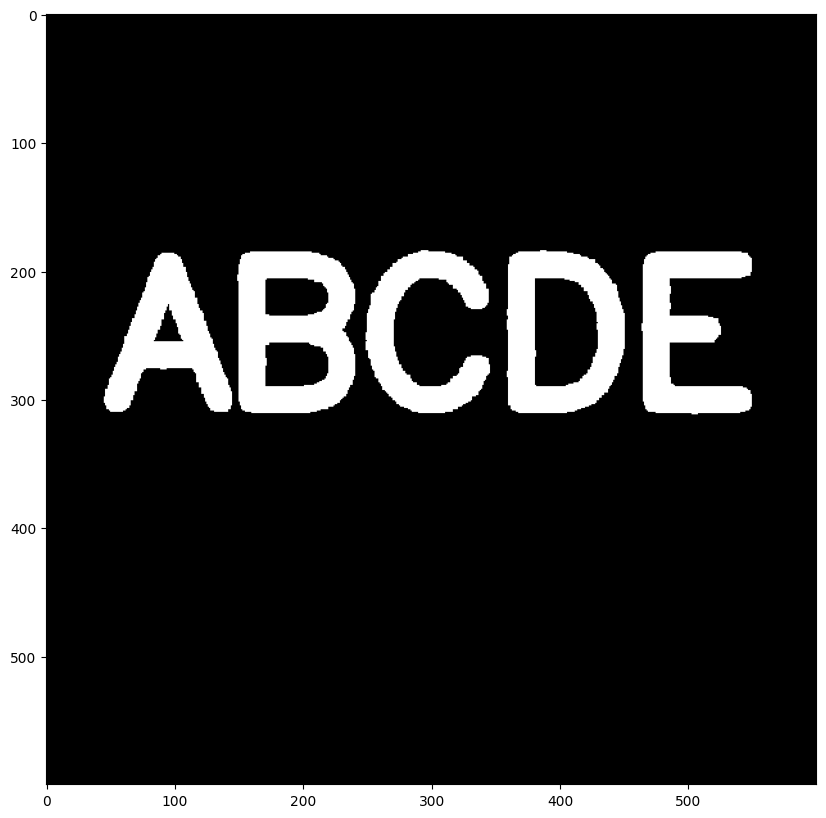

In [53]:
# Now we use erosion to remove the noise
opening = cv2.morphologyEx(noise_img, cv2.MORPH_OPEN, kernel)
display_img(opening)

In [54]:
# this cleared out a lot of the noise without too much distortion of the original text
# The image was not in the perfect condition before, so don't be confused by the unsharp edges

### Closing
Dilation followed by erosion.

Closing is useful for removing forground noise.

In [55]:
img = load_img()
black_noise = np.random.randint(low=0, high=2, size=(600,600))

In [56]:
black_noise = black_noise * -255

In [57]:
# This will now affect the original image by reducing the 255 of some of the
# pixels in the original image. So it will disturb the original image text

In [60]:
black_noise_img = img + black_noise # subtracts 255 of a randomly selected image
black_noise_img[black_noise_img==-255] = 0 # 0 should be smallest value so we need to reset the -255 to 0

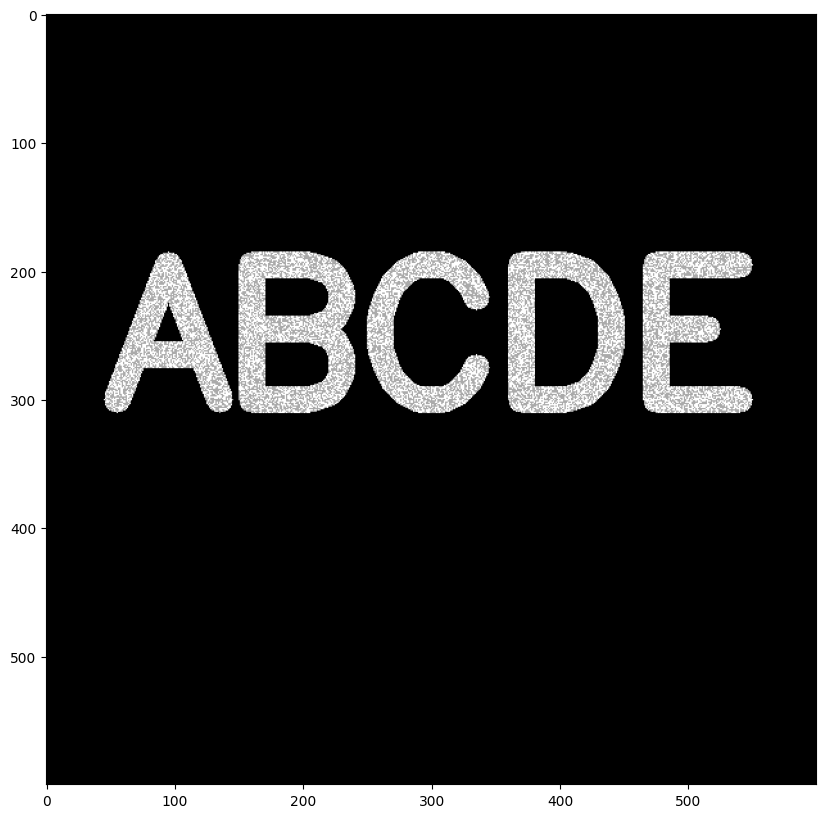

In [61]:
display_img(black_noise_img)

In [62]:
closing = cv2.morphologyEx(black_noise_img, cv2.MORPH_CLOSE, kernel)

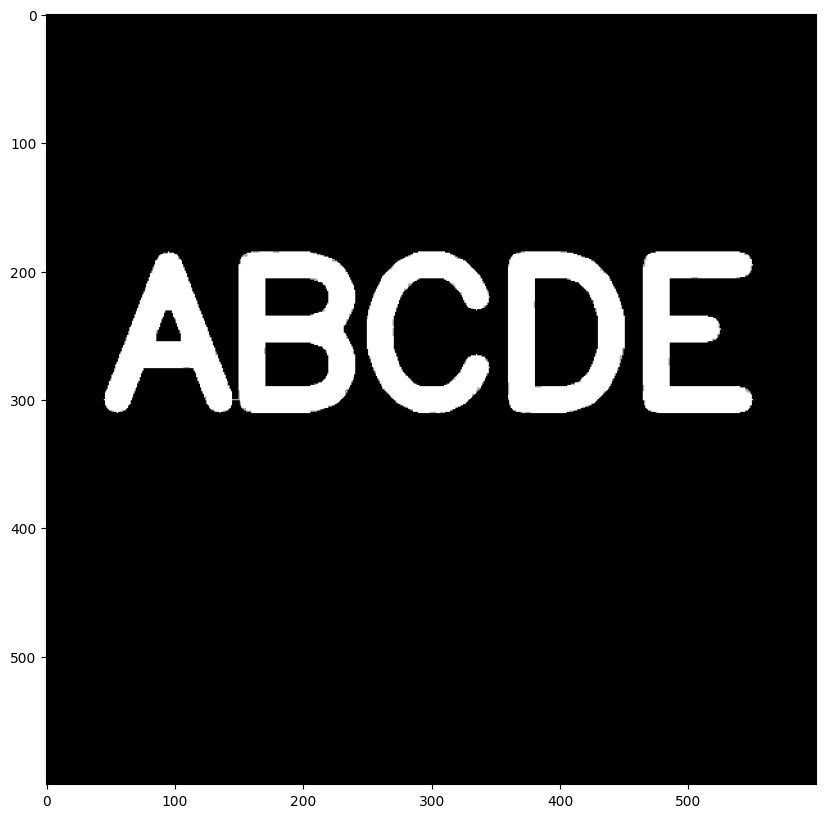

In [63]:
display_img(closing)

## Morphological Gradient
Difference between erosion and dilation.

It will take the edge between back- and foreground.

Easy edge detection.

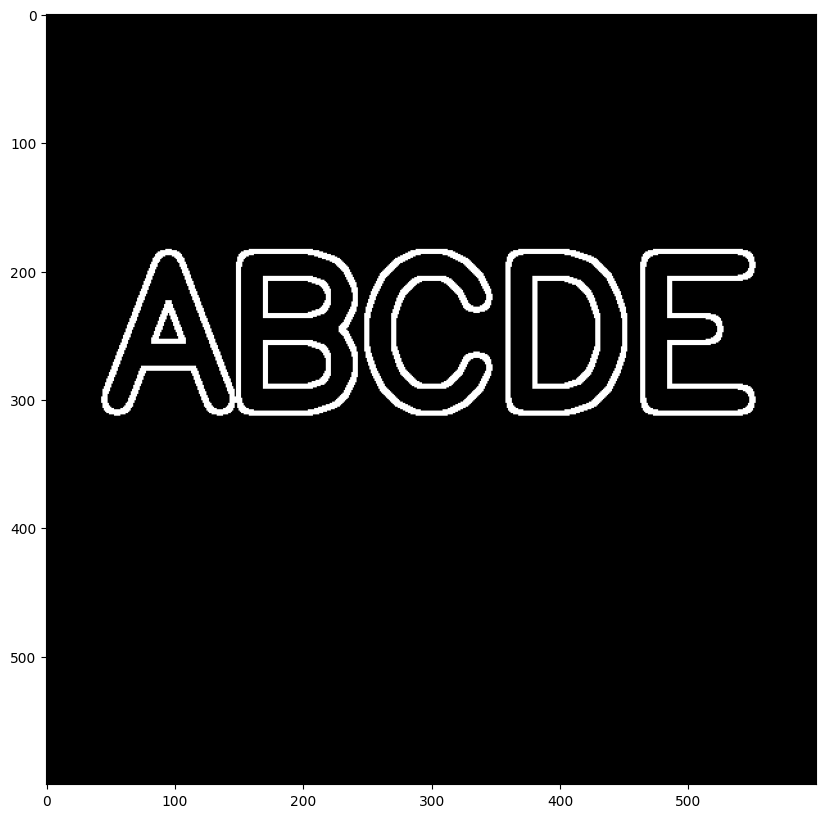

In [65]:
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
display_img(gradient)